In [1]:
import gensim
file_path = "../data/GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)

In [73]:
#60
word2vec['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [71]:
#61
similarity = word2vec.similarity('United_States', 'U.S.')
print(similarity)

0.73107743


In [78]:
#62
print(word2vec.most_similar(positive="United_States", topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370391845703), ('United_Sates', 0.74007248878479), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019070148468018)]


In [85]:
#63
print(word2vec.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

[('Greece', 0.6898481249809265), ('Aristeidis_Grigoriadis', 0.5606848001480103), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862693786621), ('Hrysopiyi_Devetzi', 0.5248444676399231), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166866183280945), ('Iraklion', 0.5146791934967041)]


In [28]:
#64
import urllib
url='http://download.tensorflow.org/data/questions-words.txt'
response = urllib.request.urlopen(url)

content=response.read().decode()

result=[]
#データ量が多いため1000件で検証
for line in content.split("\n")[1:1000]:
    words = line.split(" ")
    try:
        top_word, sim = word2vec.most_similar(positive=[words[1], words[2]], negative=[words[0]], topn=1)[0]
        result.append("{} {} {}".format(line, top_word, str(sim)))
    except:
        continue 

In [11]:
#65
cnt=0
for line in result:
    words=line.split(" ")
    if words[3]==words[4]:
        cnt+=1
print("acc : ", round(cnt/len(result), 4))

acc :  0.7876


In [26]:
#66
import pandas as pd
eval_data = pd.read_csv("../data/wordsim353/combined.csv")

sim=[]
for word1, word2 in eval_data[["Word 1","Word 2"]].values:
    sim.append(word2vec.similarity(word1, word2))

from scipy.stats import spearmanr
correlation, pvalue = spearmanr(sim, eval_data["Human (mean)"].values)
print(correlation)

0.7000166486272194


In [67]:
#67
nations=[]
with open("../data/country_names.txt") as f:
    for line in f:
        nations.append(line.strip().replace(" ", "_").replace("&_",""))

nation_vec={}
for nation in nations:
    try:
        nation_vec[nation]=word2vec[nation]
    except:
        continue

import numpy as np
from sklearn.cluster import KMeans
X=np.array(list(nation_vec.values()))
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

kmeans_dict={}
for k,v  in zip(list(nation_vec.keys()), kmeans.labels_):
    kmeans_dict[k]=v
print(sorted(kmeans_dict.items(), key=lambda x: x[1]))

[('East_Timor', 0), ('Fiji', 0), ('Kiribati', 0), ('Marshall_Islands', 0), ('Micronesia', 0), ('Nauru', 0), ('Palau', 0), ('Samoa', 0), ('Solomon_Islands', 0), ('Tonga', 0), ('Tuvalu', 0), ('Vanuatu', 0), ('Argentina', 1), ('Bahamas', 1), ('Barbados', 1), ('Belize', 1), ('Bolivia', 1), ('Brazil', 1), ('Chile', 1), ('Colombia', 1), ('Costa_Rica', 1), ('Cuba', 1), ('Dominica', 1), ('Dominican_Republic', 1), ('Ecuador', 1), ('El_Salvador', 1), ('Grenada', 1), ('Guatemala', 1), ('Guyana', 1), ('Haiti', 1), ('Honduras', 1), ('Jamaica', 1), ('Mexico', 1), ('Nicaragua', 1), ('Panama', 1), ('Paraguay', 1), ('Peru', 1), ('Portugal', 1), ('St_Kitts_Nevis', 1), ('St_Lucia', 1), ('Spain', 1), ('Suriname', 1), ('Trinidad_Tobago', 1), ('Uruguay', 1), ('Venezuela', 1), ('Afghanistan', 2), ('Australia', 2), ('Bahrain', 2), ('Bangladesh', 2), ('Belgium', 2), ('Bhutan', 2), ('Brunei', 2), ('Cambodia', 2), ('Canada', 2), ('Chad', 2), ('China', 2), ('Denmark', 2), ('Egypt', 2), ('France', 2), ('Germany', 

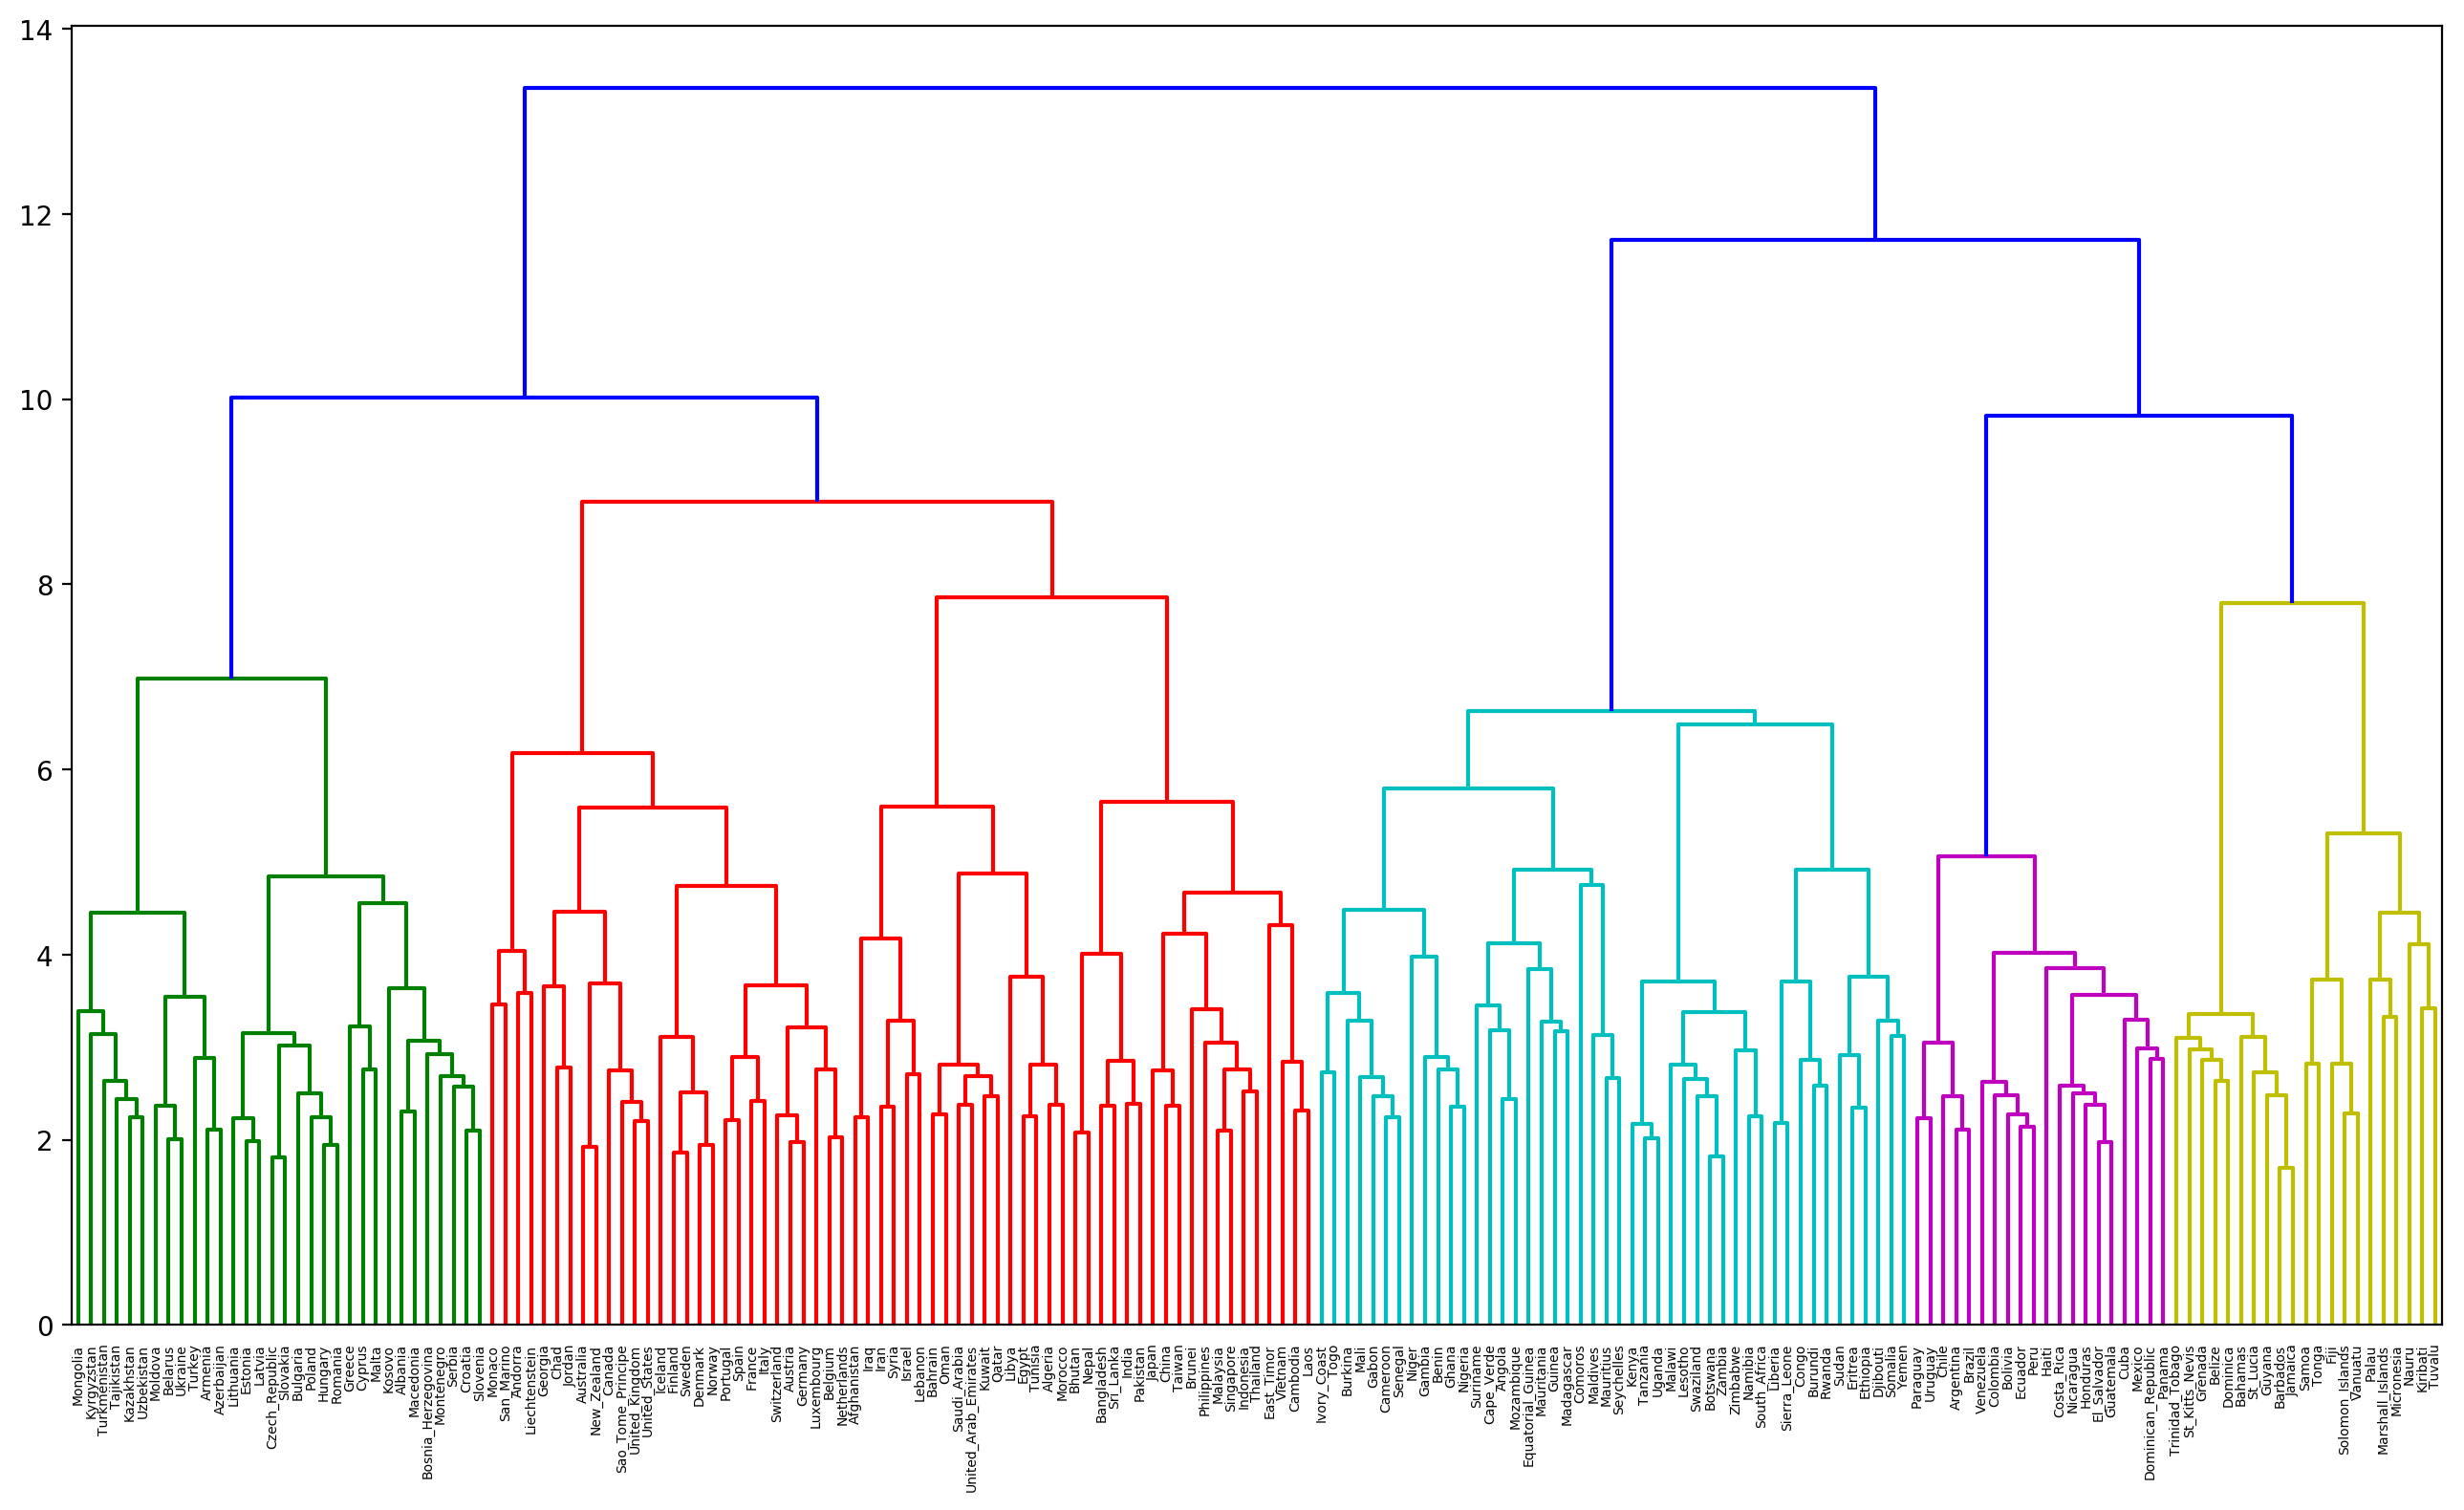

In [73]:
#68
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_result = linkage(X, method='ward', metric='euclidean')
threshold = 0.7 * np.max(linkage_result[:, 2])

plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=list(nation_vec.keys()), color_threshold=threshold)
plt.show()

In [74]:
#69
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

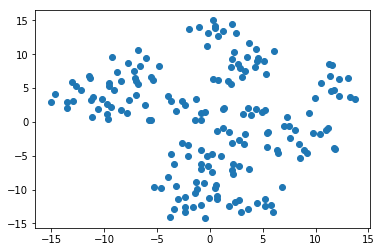

In [80]:
plt.scatter(X_embedded[:,1], X_embedded[:,0])